We will simulate convergent beam electron diffraction (CBED) patterns for Dicalcium aluminium alumosilicate (http://www.crystallography.net/cod/1000048.html). This calculation ran in 22 seconds on my home 2 GB NVIDIA GTX 750 Ti and 5 min 22 seconds on my Intel i5 CPU.

Making projected potentials:   0%|          | 0/1 [00:00<?, ?it/s]

Frozen phonon iteration:   0%|          | 0/5 [00:00<?, ?it/s]

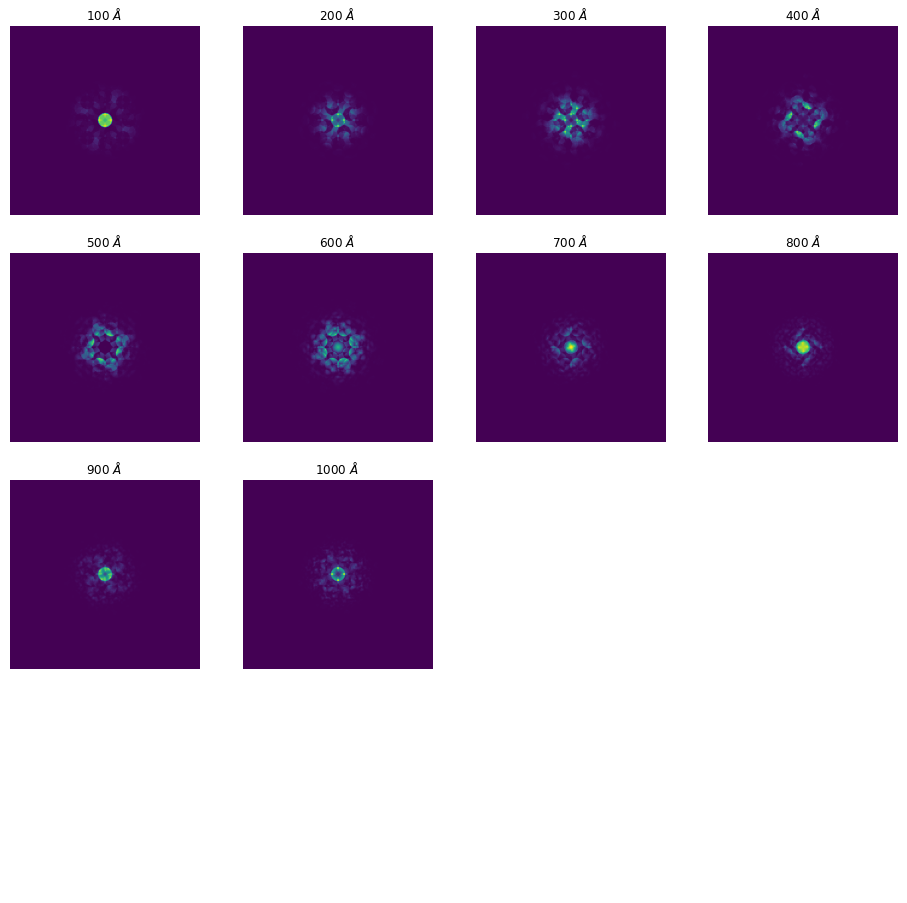

In [2]:
import pyms
import numpy as np
import torch

# Get crystal
crystal = pyms.structure.fromfile('Structures/1000048.p1',temperature_factor_units='B')

# Quick plot of crystal
# crystal.quickplot()

# Subslicing of crystal for multislice
subslices = [0.33,0.66,1.0]

# Grid size in pixels
gridshape = [1024,1024]

# Tile out grid to acceptable size
tiling = [32,32]

# Probe accelerating voltage in eV
eV = 3e5

# Probe forming aperture in mrad
app = 3 

# Number of frozen phonon passes
nfph = 5

# Choose device to run calculation on (GPU or CPU)
# device = torch.device('cpu')
device = torch.device('cuda:0')

# Set up thickness series (up to a 1000 Angstrom in steps of 100 Angstrom)
tstep = 100
thicknesses = np.arange(tstep,1001,tstep)
    
output = pyms.CBED(
    crystal,
    gridshape,
    eV,
    app,
    thicknesses,
    subslices=subslices,
    tiling=tiling,
    nfph=nfph,
    showProgress='notebook',
    device_type=device,
)

#Now plot results
import matplotlib.pyplot as plt
%matplotlib inline
nrows = int(np.ceil(np.sqrt(output.shape[0])))
fig,axes = plt.subplots(nrows=nrows,ncols=nrows,figsize=(16,16))
for ax in axes.ravel():
    ax.set_axis_off()
for i,out in enumerate(output):
    ax = axes.ravel()[i]
    ax.imshow(out)
    ax.set_title('{0} $\\AA$'.format(thicknesses[i]))